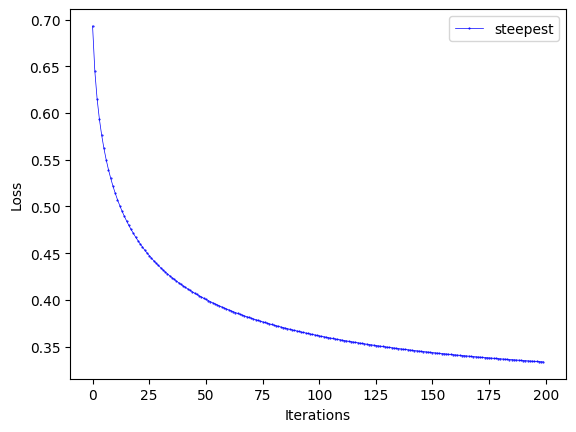

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare dataset
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 - 1

# Gradient Descent
lam = 0.1
num_iter = 200
ww = np.zeros(4)  # Initialize weight vector with zeros
##ww = np.array([3,3,3,3])
alpha_base = 0.2
ll_history = []
ww_history = []
ll_difference = []
lip = 0.25 * max(x_d4[:, 0]**2)
lam = 0.01  # Define the regularization parameter

for t in range(1, num_iter + 1):
    posterior = 1 / (1 + np.exp(-y_d4 * np.dot(x_d4, ww)))
    direction = 1 / n * np.dot((1 - posterior), y_d4[:, np.newaxis] * x_d4) + 2 * lam * ww
    ll = 1/n * np.sum(np.log(1 + np.exp(-y_d4 * np.dot(x_d4, ww)))) + lam * np.dot(ww, ww)
    ww_history.append(ww.copy())
    ll_history.append(ll)
    ww = ww + alpha_base * 1.0 / np.sqrt(t) / lip * direction

for t in range(1, 101):
  ll_difference.append(np.log10(np.abs(ll_history[t-1]-ll_history[199])))
# Plot the optimization progress
plt.plot(ll_history, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

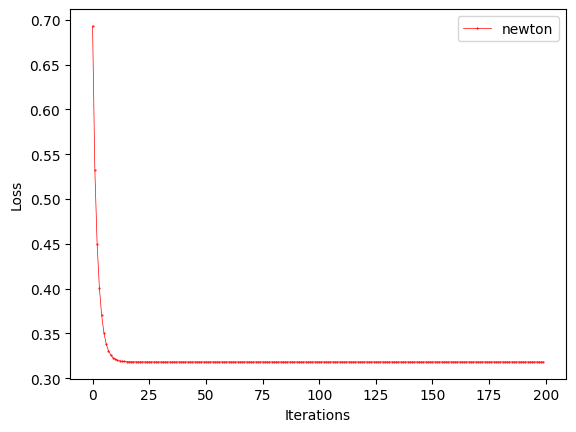

In [ ]:
# Newton's Method
num_iter = 200
ll_n_history = np.zeros(num_iter)
ww_n_history = np.zeros((num_iter, 4))
ll_n_difference = np.zeros(100)
ww = np.zeros(4)  # Initialize weight vector with zeros

for t in range(num_iter):
    posterior = 1 / (1 + np.exp(-y_d4 * np.dot(x_d4, ww)))

    grad = 1 / n * np.dot((1 - posterior) * (-y_d4), x_d4) + 2 * lam * ww

    # Calculate Hessian using np.einsum()
    hess = 1 / n * np.einsum('i,ij,ik->jk', posterior * (1 - posterior), x_d4, x_d4) + 2 * lam * np.eye(4)

    ll = 1/n * np.sum(np.log(1.0 + np.exp(-y_d4 * np.dot(x_d4, ww)))) + lam * np.dot(ww, ww)
    ww_n_history[t] = ww
    ll_n_history[t] = ll
    ww = ww - np.linalg.solve(hess, grad) * 1.0 / np.sqrt(t + 10)

for t in range(1, 101):
  ll_n_difference[t-1] = (np.log10(np.abs(ll_n_history[t-1]-ll_n_history[199])))
# Plot the optimization progress
plt.plot(ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

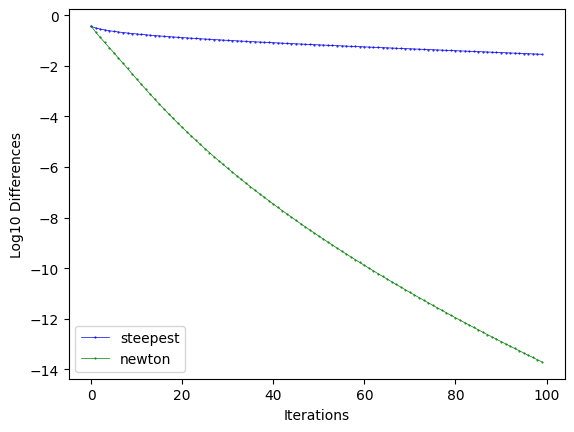

In [ ]:
#compare
plt.plot(ll_difference, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot(ll_n_difference, 'go-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Log10 Differences')
plt.show()